<a href="https://colab.research.google.com/github/brenoslivio/StatisticsTutoring/blob/main/Monitoria_Aula_Pratica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SME0320 - Estatística I

**Monitoria - Aula Prática de Análise de Dados**


*Material para Aula Prática de Análise de Dados em 22/12/2021. Para a execução desse Jupyter Notebook clique no botão acima para abrir na plataforma Google Colab.*

---

## Apresentação ao ambiente Jupyter

### Células de texto e de código

O ambiente de trabalho do Jupyter é composto por células de texto e de código. O ambiente funciona de forma interativa, permitindo que o usuário interaja com o código ao executá-lo. Exemplo de célula de código:

In [ ]:
a = 25
b = 35

a

25

Após indicados valores para as variáveis, a célula de código devolveu o valor da variável 'a' por ter sido a última linha do código. Exemplo se quiséssemos a soma das variáveis:

In [ ]:
a + b

60

Se colocamos um novo valor para 'a' perceba que o resultado da célula de cima será alterado. Isso ocorre pois na execução do Notebook Jupyter, existe uma espécie de memória alocada para as variáveis.

In [ ]:
a = 37

### Bibliotecas

#### ![Pandas](https://github.com/brenoslivio/StatisticsTutoring/blob/main/imgs/img2.png?raw=1)

Pandas é uma biblioteca de Python que permite trabalhar com conjuntos de dados ao possibilitar diversas funções de análise apropriadas para análise.

Mais exemplos de funções do Pandas: [Pandas User Guide](https://pandas.pydata.org/docs/user_guide/index.html).

Vamos carregar um conjunto de dados de tartarugas:

In [ ]:
import pandas as pd

# Lê o arquivo csv
dadosTartaruga = pd.read_csv("https://people.math.sc.edu/Burkardt/datasets/csv/turtles.csv")

# Mostra 10 primeiras observações do csv
dadosTartaruga.head(10)

,INDEX,COLLECTION,SEX,LENGTH,WIDTH,HEIGHT
0,1,"""CMNH""","""F""",202,156,89
1,2,"""CMNH""","""F""",198,153,91
2,3,"""CMNH""","""F""",198,153,89
3,4,"""CMNH""","""F""",213,164,90
4,5,"""CMNH""","""F""",214,165,88
5,6,"""CMNH""","""F""",162,132,67
6,7,"""CMNH""","""F""",203,157,84
7,8,"""CMNH""","""F""",186,150,80
8,9,"""SREL""","""F""",196,163,85
9,10,"""SREL""","""F""",225,183,100


#### ![Matplotlib](https://matplotlib.org/_static/images/logo2.svg)

Temos também bibliotecas para visualização de gráficos, sendo uma das mais conhecidas a Matplotlib. 

Para mais exemplos de funções acesse: [matplotlib.org](https://matplotlib.org/).

Temos, por exemplo, o seguinte gráfico em barras para quantidade de tartarugas machos e fêmeas:

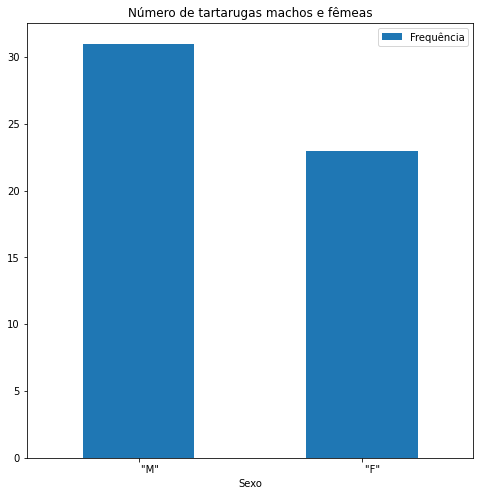

In [ ]:
import matplotlib.pyplot as plt

# Frequência para cada tipo único da variável SEX
sex = dadosTartaruga['SEX'].value_counts().to_frame().reset_index()

# Nome para as colunas
sex.columns = ['Sexo', 'Frequência']

# Gráfico em barras
sex.plot.bar(x = 'Sexo', y = 'Frequência', rot = 0, title = "Número de tartarugas machos e fêmeas");

# Configurações da parte gráfica
fig = plt.gcf()
fig.set_size_inches(8, 8) # Tamanho da imagem

plt.show();

#### ![SciPy](https://www.firelinescience.com/wp-content/uploads/2019/09/SciPy-Logo.png)

SciPy é uma biblioteca de computação científica para Python. Ela contém diversas funções estatísticas que podem ser úteis para análise de dados.

Para mais informações das funções acesse: [Statistical functions](https://docs.scipy.org/doc/scipy/reference/stats.html).

Encontrando o valor Z dado o percentil 0.975 na distribuição normal padrão:

In [ ]:
from scipy import stats

stats.norm.ppf(0.975)

1.959963984540054

Encontrando o percentil dado o valor Z:

In [ ]:
stats.norm.cdf(1.96)

0.9750021048517795

## Análise Descritiva

Sobretudo, para uma Análise Descritiva dos dados, é importante nos relembrarmos das características que as variáveis podem assumir:

![img1](https://github.com/brenoslivio/StatisticsTutoring/blob/main/imgs/img1.png?raw=1)

Ao classificar propriamente as variáveis conseguimos adquirir noções de, por exemplo, quais gráficos fazem sentido para a visualização dos dados.

Ainda com os dados das tartarugas, vemos variáveis como COLLECTION, que é uma variável qualitativa. Considerando isso, uma medida interessante de se analisar é a moda:

In [ ]:
dadosTartaruga["COLLECTION"].mode()

0      "SREL"
dtype: object

Agora trabalhando com dados de árvores que possui apenas variáveis contínuas para análise:

In [ ]:
dadosTree = pd.read_csv("https://people.math.sc.edu/Burkardt/datasets/csv/trees.csv")

# 10 amostras aleatórias
dadosTree.sample(10)

,Index,"""Girth (in)""","""Height (ft)""","""Volume(ft^3)"""
2,3,8.8,63,10.2
7,8,11.0,75,18.2
13,14,11.7,69,21.3
26,27,17.5,82,55.7
1,2,8.6,65,10.3
6,7,11.0,66,15.6
23,24,16.0,72,38.3
8,9,11.1,80,22.6
20,21,14.0,78,34.5
17,18,13.3,86,27.4


Vamos calcular o primeiro quartil para a variável de volume:

In [ ]:
dadosTree[' "Volume(ft^3)"'].quantile(0.25)

19.4

Podemos também desenvolver um box plot para visualizar a distribuição da variável:

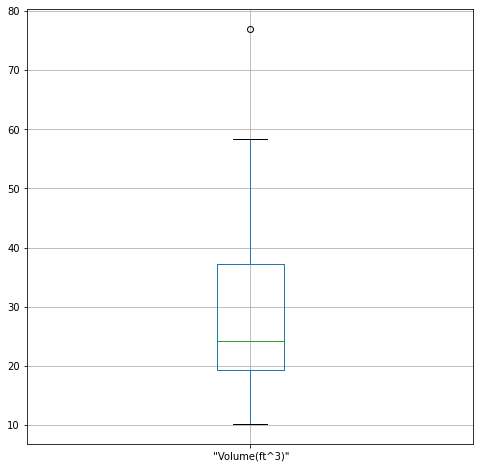

In [ ]:
# Configuração da parte gráfica
fig = plt.gcf()
fig.set_size_inches(8, 8) # Tamanho da imagem

dadosTree.boxplot(column = [' "Volume(ft^3)"']);

Em gráficos de caixas conseguimos detectar visualmente a presença de valores discrepantes (outliers). Eles são considerando de acordo com a distância interquartil, dada pela diferença do terceiro quartil pelo primeiro:

$$IQR = Q_3 - Q_1$$

E podemos considerar como valor discrepante com:

$$outliers = x_i\;<\;(Q_1 - k.IQR)\;\vee\;x_i\;>\;(Q_3 + k.IQR)$$

Sendo $k$ um valor arbitrário, geralmente adotado na literatura $k = 1.5$, mas pode ser mudado conforme a intenção da análise.

Para o gráfico de caixa anterior, podemos encontrar a observação que teve a variável de volume como discrepante:

In [ ]:
Q1 = dadosTree[' "Volume(ft^3)"'].quantile(0.25) # Primeiro quartil
Q3 = dadosTree[' "Volume(ft^3)"'].quantile(0.75) # Terceiro quartil

IQR = Q3 - Q1 # Distância interquartil

# Analisamos acima do terceiro quartil
dadosTree[dadosTree[' "Volume(ft^3)"'] > (Q3 + 1.5 * IQR)]

,Index,"""Girth (in)""","""Height (ft)""","""Volume(ft^3)"""
30,31,20.6,87,77.0


Sabemos que o desvio padrão é calculado por:

$$\sigma = \sqrt{\sigma^2} = \sqrt{\frac{1}{N}\displaystyle\sum_{i=1}^{N}(x_i - \mu)^2}$$

Entretanto, a fórmula é considerada um estimador enviesado para considerar uma população. Temos o seguinte estimador não viesado:

$$\sigma = \sqrt{\sigma^2} = \sqrt{\frac{1}{N - 1}\displaystyle\sum_{i=1}^{N}(x_i - \mu)^2}$$

É importante notar propriedades de certos estimadores, principalmente considerando o manuseio de dados que lidam com amostras de uma população. Temos a função do Pandas que faz o cálculo considerando o estimador não viesado:

In [ ]:
dadosTree[' "Girth (in)"'].std(ddof = 1)

3.1381386168387504

O parâmetro 'ddof' da função indica os "graus de liberdade", é o número de valores no cálculo final de uma estatística que são livres para variar. Usamos o valor 1 na função para indicar que queremos usar N - 1 graus de liberdade, o que nos dá um estimador não viesado.

A função 'corr' do Pandas calcula o coeficiente de correlação linear (Pearson) entre os possíveis pares de variáveis:

In [ ]:
dadosTree.corr(method = 'pearson')

,Index,"""Girth (in)""","""Height (ft)""","""Volume(ft^3)"""
Index,1.000000,0.967207,0.467204,0.903349
"""Girth (in)""",0.967207,1.000000,0.519280,0.967119
"""Height (ft)""",0.467204,0.519280,1.000000,0.598250
"""Volume(ft^3)""",0.903349,0.967119,0.598250,1.000000


Pares com Index podem ser descartados por a variável ser apenas um índice para as observações. Podemos observar uma correlação alta entre a variável de volume e circunfêrencia da árvore. Podemos fazer o seguinte gráfico de dispersão (scatter plot) e analisar visualmente a correlação entre as variáveis, também fazendo uma regressão linear simples:

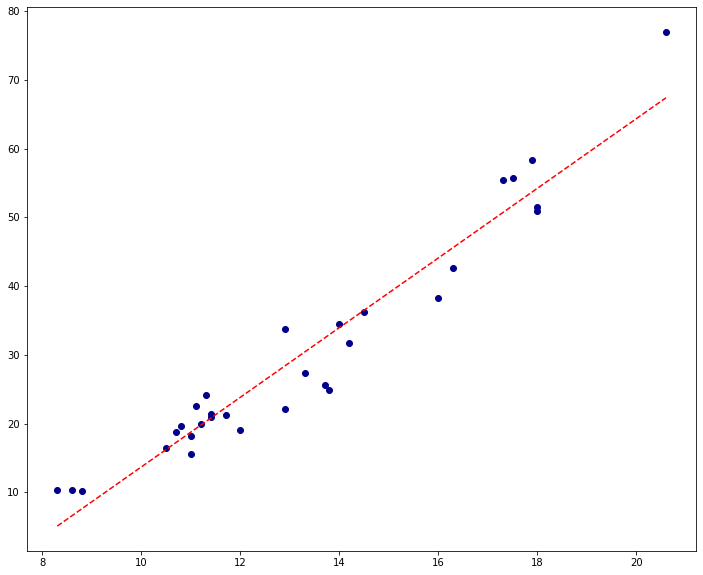

In [ ]:
import numpy as np # Biblioteca para calcular regressão

x = dadosTree[' "Girth (in)"']
y = dadosTree[' "Volume(ft^3)"']

# Gráfico de pontos
plt.scatter(x, y, c = 'DarkBlue')

# Regressão linear
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

# Configuração do gráfico e ajuste do tamanho
fig = plt.gcf()
fig.set_size_inches(12, 10)

plt.show();

Agora vamos carregar um conjunto de dados de seguros e analisar os tipos de frequências para as regiões das observações coletadas:

In [ ]:
dadosSeguro = pd.read_csv('https://people.math.sc.edu/Burkardt/datasets/csv/insurance.csv')

# 10 amostras aleatórias
dadosSeguro.sample(10)

,age,sex,bmi,children,smoker,region,charges
1008,25,male,24.985,2,no,northeast,23241.47453
1102,29,male,38.940,1,no,southeast,3471.40960
927,57,female,20.100,1,no,southwest,12032.32600
1334,18,female,31.920,0,no,northeast,2205.98080
1076,47,female,32.000,1,no,southwest,8551.34700
1175,22,female,27.100,0,no,southwest,2154.36100
159,50,female,27.830,3,no,southeast,19749.38338
320,34,male,25.270,1,no,northwest,4894.75330
782,51,male,35.970,1,no,southeast,9386.16130
1300,45,male,30.360,0,yes,southeast,62592.87309


As frequências absolutas podem ser encontradas com a função 'value_counts()' do Pandas.

In [ ]:
dadosSeguro['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Da mesma forma, se quiséssemos as frequências relativas, podemos usar o parâmetro 'normalize = True':

In [ ]:
dadosSeguro['region'].value_counts(normalize = True)

southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64

Por fim, as frequências acumuladas são calculadas da seguinte forma, com a função 'cumsum()' adicionada:

In [ ]:
dadosSeguro['region'].value_counts().cumsum()

southeast     364
southwest     689
northwest    1014
northeast    1338
Name: region, dtype: int64

## Inferência Estatística

A inferência estatística tem como objetivo fazer afirmações sobre uma característica de uma população a partir do conhecimento de dados de uma parte desta população. A análise descritiva é de suma importância para a inferência estatística por assumir valores estatísticos para os conjuntos de amostras usados de estudo para a inferência estatística.

Vamos trabalhar com várias funções da biblioteca SciPy para o uso de métodos inferenciais.

Vamos entender como calcular o intervalo de confiança considerando a média de uma variável em um conjunto de dados. Calculamos para a idade nos dados de seguros considerando um intervalo de 95% de confiança (usando distribuição t de Student):

In [ ]:
Xbarra = dadosSeguro['age'].mean()
erroPadrao = stats.sem(dadosSeguro['age']) # sigma / sqrt(n)

stats.t.interval(0.95, len(dadosSeguro['age']) - 1, loc = Xbarra, scale = erroPadrao)

(38.453516373452935, 39.96053444866964)

Se o tamanho de $n$ for suficientemente grande, podemos considerar que a média amostral é normalmente distribuída, dessa forma usamos a seguinte função:

In [ ]:
stats.norm.interval(0.95, loc = Xbarra, scale = erroPadrao)

(38.45419850249946, 39.95985231962312)

Podemos também realizar testes de hipótese com a intenção de, por exemplo, verificar se é estatisticamente significativo a diferença entre o IMC de homens e mulheres. Podemos fazer o seguinte:

In [ ]:
homens = dadosSeguro[dadosSeguro['sex'] == 'male']
mulheres = dadosSeguro[dadosSeguro['sex'] == 'female']

stats.ttest_ind(homens['bmi'], mulheres['bmi'], equal_var = False)

Ttest_indResult(statistic=1.697027933124022, pvalue=0.08992430667834876)

Perceba que ao realizar esse teste, precisamos supor que o IMC é uma variável com distribuição normal. Podemos também indicar a hipótese alternativa para trabalhar com o teste de uma cauda só, indicando que o IMC dos homens pode ser maior que o IMC dos mulheres:

In [ ]:
stats.ttest_ind(homens['bmi'], mulheres['bmi'], equal_var = False, alternative = 'greater')

Ttest_indResult(statistic=1.697027933124022, pvalue=0.04496215333917438)

Nesse caso, o p-valor, considerando um nível de significância de 5%, é usado para rejeitar a hipótese nula de médias iguais em favor da hipótese alternativa do IMC de homens maior que o de mulheres.

## Outras referências para ajudar

### Conjuntos de Dados

Alguns exemplos de sites para encontrar conjuntos de dados:

- [Portal Brasileiro de Dados Abertos](https://dados.gov.br/)
- [Kaggle](https://www.kaggle.com/)

### Transformar o Jupyter Notebook em um relatório

É também possível transformar o Jupyter Notebook diretamente para um arquivo em extensão pdf. Alguns sites que fazem esse serviço considerando o arquivo ipynb do Google Colab:

- [vertopal](https://www.vertopal.com/en/document/convert/ipynb-to-pdf)

- [htmltopdf](https://htmtopdf.herokuapp.com/ipynbviewer/)

### Dicas para o projeto

Se usar o Jupyter, é interessante que sua primeira célula de código já começe importando as bibliotecas possíveis, igual dessa forma:

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

Para análises estatísticas, sempre procure responder algumas perguntas como:

- Quais análises são possíveis com esse conjunto de dados?
- Essa análise faz sentido considerando a classe da variável?
- Quais representações visuais são possíveis com tais variáveis?
- Para essa análise quais suposições foram feitas? (se a variável tem distribuição normal e etc.)

---

Dados de exemplo coletados de [https://people.math.sc.edu/Burkardt/datasets/csv/csv.html](https://people.math.sc.edu/Burkardt/datasets/csv/csv.html).